In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

basepath = "../../tmp/processed/attendance/6504c0a30267c540afff568a/0/"
files = []

for file in os.listdir(basepath):
    files.append(basepath + file)

In [9]:
BLACK_THRESHOLD = 0.01


def isAbsent(file_path: str) -> bool:
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))

    # remove 15px from each side but keeping the same center
    img = img[15:35, 15:35]

    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)  # type: ignore
    img = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # calculate black pixel percentage
    black = np.count_nonzero(img == 0)
    white = np.count_nonzero(img == 255)
    total = black + white
    black_percentage = black / total

    return black_percentage < BLACK_THRESHOLD


# if absent remove from files[]
for file in files:
    if isAbsent(file):
        files.remove(file)

print(files)

['../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0159.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0198.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0402.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0628.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0806.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0947.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_1529.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_1840.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2170.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2347.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2491.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2861.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2

In [10]:
from skimage import img_as_ubyte  # type: ignore
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters, transform  # type: ignore

canvas_size = (952, 1360)
# canvas_size = (150, 220)

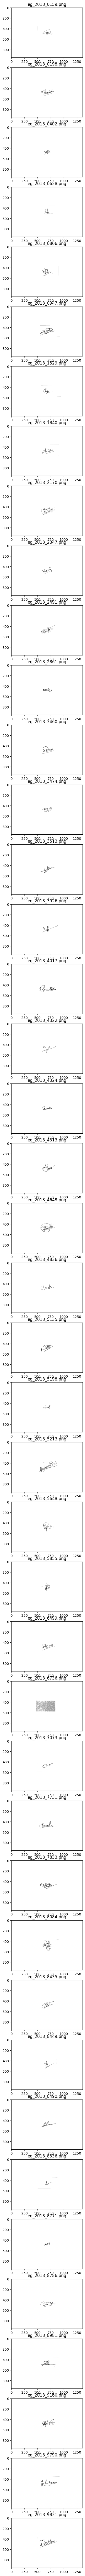

In [11]:
from services_sign_process.preprocess import normalize_image


f, ax = plt.subplots(len(files), 1, figsize=(95, 136))

for idx, file in enumerate(files):
    img = imread(file, as_gray=True)
    image = img_as_ubyte(img)

    preprocessed = normalize_image(image, canvas_size)

    ax[idx].imshow(preprocessed, cmap="gray")
    ax[idx].set_title(file.split("/")[-1])

    cv2.imwrite(
        "../../tmp/processed/preprocessing/" + file.split("/")[-1], preprocessed
    )

plt.show()